

# 1. **White Noise**
White noise is a basic stochastic process with the following properties:
- **Mean**: \( E[X(t)] = 0 \)
- **Covariance**:$ (E[X(t)X(s)] = \sigma^2 \delta(t-s) )$, where $(\delta)$ is the Dirac delta function.
- **Power spectral density**: Uniform across all frequencies.
  
Mathematically, white noise is a sequence of independent and identically distributed (i.i.d) random variables, often modeled as Gaussian noise with zero mean and variance $( \sigma^2 )$.

# 2. **Wiener Process (Brownian Motion)**
The Wiener process, denoted as $( W(t) )$, is a continuous-time stochastic process with the following properties:


*  **Initial condition**: $( W(0) = 0 )$
*   **Independent increments**: For any $( 0 \leq t_1 < t_2 < \dots < t_n )$, the increments $( W(t_2) - W(t_1), \dots, W(t_n) - W(t_{n-1}) )$ are independent.


  
- **Continuous paths**: The sample paths of $( W(t) )$ are almost surely continuous.
  


- **Normal increments**: $( W(t) - W(s) \sim \mathcal{N}(0, t - s) ) for ( t \geq s )$.
  
-  **probability density function (PDF)** of $( W(t) )$ is normally , i.e.,

$$
f_W(x, t) = \frac{1}{\sqrt{2 \pi t}} e^{-\frac{x^2}{2t}}.
$$

The Wiener process is the integral of white noise, i.e.,

$$
W(t) = \int_0^t X(s) ds.
$$

# 3. **Lévy Process**
A Lévy process is a stochastic process with stationary and independent increments. The Wiener process is a special case of a Lévy process. In general, a Lévy process $( X(t) )$ satisfies:
- **Stationary increments**: $( X(t) - X(s) )$ has the same distribution as $( X(t-s) )$.
- **Independent increments**: Increments over non-overlapping intervals are independent.
- **Càdlàg paths**: The paths of a Lévy process are right-continuous with left limits.

For Lévy processes, the **characteristic function** is given by the **Lévy-Khintchine formula**:
$$
\mathbb{E}[ e^{i u X(t)} ] = \exp( t ( i u \gamma - \frac{1}{2} u^2 \sigma^2 + \int_{\mathbb{R}} ( e^{i u x} - 1 - i u x \mathbf{1}_{|x|<1} ) \nu(dx) ) )
$$


where $( \gamma )$ is the drift, $( \sigma ) $is the volatility, and$ ( \nu )$ is the Lévy measure.


### Comparison of the Processes:
- **White Noise**: Pure randomness with no memory; independent and identically distributed increments.
- **Wiener Process**: Continuous-time process with normally distributed increments, essentially a "smooth" version of white noise.
- **Lévy Process**: Generalization of both Wiener and Poisson processes; includes both continuous Brownian motion and discrete jumps.


# Numerical Integration & Python Code

To compare these processes numerically, we can simulate them in Python. The Wiener process can be simulated using cumulative sums of Gaussian white noise. A simple Lévy process (e.g., the Poisson process) can be simulated as a jump process.

Here's Python code to simulate and compare White Noise, Wiener Process, and a basic Lévy Process:


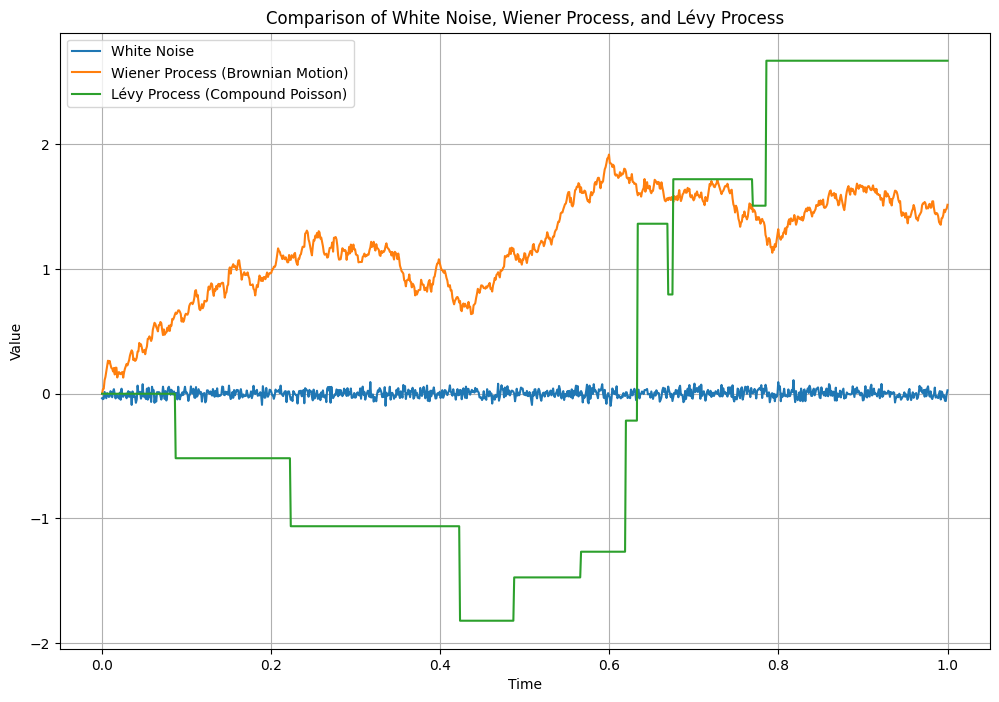

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0      # Total time
N = 1000     # Number of time steps
dt = T / N   # Time step
t = np.linspace(0, T, N)  # Time grid

# White Noise
def white_noise(N, dt):
    return np.random.normal(0, np.sqrt(dt), size=N)

# Wiener Process (Brownian Motion)
def wiener_process(N, dt):
    dW = white_noise(N, dt)  # Incremental changes
    W = np.cumsum(dW)  # Cumulative sum to simulate Wiener process
    return W

# Lévy Process (Basic - Compound Poisson Process with jumps)
def levy_process(N, dt, lam=10, jump_mean=0.0, jump_std=1.0):
    # Poisson distributed jump occurrences
    jump_times = np.random.poisson(lam * dt, size=N)
    jumps = np.random.normal(jump_mean, jump_std, size=N) * jump_times  # Gaussian jumps
    L = np.cumsum(jumps)
    return L

# Simulating the processes
wn = white_noise(N, dt)
wp = wiener_process(N, dt)
levy = levy_process(N, dt)

# Plotting the processes
plt.figure(figsize=(12, 8))
plt.plot(t, wn, label="White Noise")
plt.plot(t, wp, label="Wiener Process (Brownian Motion)")
plt.plot(t, levy, label="Lévy Process (Compound Poisson)")
plt.title("Comparison of White Noise, Wiener Process, and Lévy Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# **Introduction to Stochastic Differential Equations (SDEs) and Stochastic Integrals**

In financial mathematics, **Stochastic Differential Equations (SDEs)** and **stochastic integrals** are fundamental tools for modeling random processes such as stock prices, interest rates, and other financial variables. Unlike ordinary differential equations (ODEs), SDEs incorporate randomness, typically through **Brownian motion (Wiener process)** or other stochastic processes, making them highly suitable for financial modeling.

## 1. Stochastic Integrals

A **stochastic integral** involves integrating a stochastic process with respect to another stochastic process, typically a **Brownian motion**$( W_t )$. A common form of stochastic integral is:

$$
I(t) = \int_0^t f(X_s, s) dW_s
$$

where:
- $( f(X_s, s) )$ is a stochastic process.
- $( W_t )$ is a Brownian motion.

These integrals are essential because they allow us to compute accumulated effects over time when randomness is involved.

## 2. Stochastic Differential Equations (SDEs)

An **SDE** models the evolution of a system that changes over time with both deterministic and random components. The general form of an SDE is:

$$
dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t
$$

- $( X_t )$ is the stochastic process being modeled (e.g., stock price).
- $( \mu(X_t, t) )$ is the **drift term**, representing the deterministic trend or expected change.
- $( \sigma(X_t, t) )$ is the **diffusion term**, representing the volatility or random part.
- $( dW_t )$ is an increment of a **Brownian motion (Wiener process)**, introducing randomness.

The solution to an SDE provides a way to model the evolution of the process over time.



# Types of SDEs in Financial Models

Below, we will introduce several types of SDEs used in financial markets, including their mathematical forms, applications, and key statistical properties.



### 1. **Geometric Brownian Motion (GBM)**

The most widely known SDE in finance is the **Geometric Brownian Motion (GBM)**, which models stock prices under the assumption that returns are normally distributed.

#### Mathematical Form

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

- $( S_t )$ is the stock price at time \( t \).
- $( \mu )$ is the drift rate (expected return).
- $( \sigma )$ is the volatility (standard deviation of returns).
- $( dW_t )$ is an increment of Brownian motion.

#### Analytical Solution

The analytical solution to the GBM is:

$$
S_t = S_0 \exp\left( \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \right)
$$

where $( S_0 )$ is the initial stock price.

GBM is the foundation of the **Black-Scholes model**, used for option pricing.

#### Statistical Properties

- **Mean**: $( \mathbb{E}[S_t] = S_0 e^{\mu t} )$
- **Variance**: $( \text{Var}(S_t) = S_0^2 e^{2\mu t} \left( e^{\sigma^2 t} - 1 \right) )$

### 2. **Levy Processes**

**Levy processes** generalize Brownian motion by allowing jumps, making them useful for modeling more realistic financial processes where sudden large price changes occur (e.g., market crashes).

#### Mathematical Form

A Levy process $( X_t )$ can be written as:

$$
X_t = \mu t + \sigma W_t + J_t
$$

- $( \mu t )$ is the drift term.
- $( \sigma W_t )$ is the Brownian motion component.
- $( J_t )$ is a **jump process**, often modeled using a **Poisson process** or more general Levy measure.

#### Solution and Application

Levy processes are used in the **Merton jump-diffusion model**, where jumps are added to the GBM to account for discontinuities in stock prices.

### 3. **Heston Model**

The **Heston model** is a stochastic volatility model where the volatility of the stock price follows its own SDE. This allows for more realistic modeling of assets where volatility is not constant.

#### Mathematical Form

The Heston model consists of two coupled SDEs:

$$
dS_t = \mu S_t dt + \sqrt{V_t} S_t dW_t^S
$$
$$
dV_t = \kappa(\theta - V_t) dt + \sigma \sqrt{V_t} dW_t^V
$$

- $( S_t )$ is the stock price.
- $( V_t )$ is the volatility (variance) process.
- $( \kappa )$ is the rate of mean reversion for volatility.
- $( \theta )$ is the long-term average volatility.
- $( \sigma )$ is the volatility of volatility.
- $( W_t^S )$ and $( W_t^V )$ are two correlated Brownian motions.

#### Statistical Properties

- **Mean reversion**: Volatility tends to revert to a long-term mean $( \theta )$.
- **Volatility clustering**: Large movements in the price are often followed by large volatility.

### 4. **Merton Jump-Diffusion Model**

The **Merton model** extends the GBM by adding jumps, making it a **jump-diffusion process**. This allows for sudden large moves in asset prices, which are common in real markets.

#### Mathematical Form

$$
dS_t = \mu S_t dt + \sigma S_t dW_t + S_t dJ_t
$$

- $( dJ_t )$ is a **Poisson jump process** with jump size drawn from a distribution (e.g., normal or exponential).
- The jump intensity $( \lambda )$ determines the frequency of jumps.

#### Applications

Merton's model is used to price options in markets where there is significant probability of large moves in asset prices.

### 5. **Fractional Geometric Brownian Motion (FGBM)**

**Fractional Brownian motion (FBM)** is a generalization of Brownian motion with a **Hurst parameter** \( H \in (0,1) \), which introduces memory effects into the process.

#### Mathematical Form

$$
dS_t = \mu S_t dt + \sigma S_t dB_t^H
$$

- $( B_t^H )$ is a **fractional Brownian motion** with Hurst parameter $( H )$.

- If $( H = 0.5 )$, the process reduces to standard Brownian motion.

#### Statistical Properties

- For $( H > 0.5 )$, the process exhibits **positive autocorrelation** (long-range dependence).
- For $( H < 0.5 )$, the process exhibits **negative autocorrelation**.

### 6. **Ornstein-Uhlenbeck (OU) Process**

The **Ornstein-Uhlenbeck (OU) process** is a mean-reverting process, often used to model interest rates or volatility in financial markets.

#### Mathematical Form

$$
dX_t = \theta(\mu - X_t) dt + \sigma dW_t
$$

- $( \theta )$ is the speed of mean reversion.
- $( \mu )$ is the long-term mean to which the process reverts.
- $( \sigma )$ is the volatility.
- $( W_t )$ is a Brownian motion.

#### Solution

The solution to the OU process is:

$$
X_t = X_0 e^{-\theta t} + \mu(1 - e^{-\theta t}) + \sigma \int_0^t e^{-\theta(t-s)} dW_s
$$

#### Application

The OU process is commonly used in the **Vasicek model** for interest rates, where rates tend to revert to a long-term mean.

---


#Analytical Solution of Stochastic Differential Equations (SDEs) using Ito's Lemma

Ito's Lemma is a fundamental tool for solving stochastic differential equations (SDEs). It generalizes the chain rule from calculus to stochastic processes. Specifically, it is used when the process involves a stochastic term (e.g., Brownian motion).

We will solve a few stochastic differential equations (SDEs) analytically using **Ito's Lemma**. Let's begin with some key concepts.



### 1. **Ito's Lemma** (Ito's Rule)

If a stochastic process $( X_t )$ follows an SDE of the form:

$$
dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t
$$

where:
- $( \mu(X_t, t) )$ is the drift term (deterministic),
- $( \sigma(X_t, t) )$ is the volatility (stochastic),
- $( W_t )$ is a standard Wiener process (Brownian motion),

and $( f(X_t, t) )$ is a twice differentiable function, then **Ito's Lemma** states that the differential of $( f(X_t, t) )$ is given by:

$$
df(X_t, t) = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial X_t} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial X_t^2} \sigma^2(X_t, t) dt
$$

Now, let's solve a few specific SDEs using this lemma.

---

### 2. **Geometric Brownian Motion (GBM)**

The **Geometric Brownian Motion (GBM)** is a widely used SDE in finance, especially in modeling stock prices under the Black-Scholes model.

The SDE for **GBM** is:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

where:
- $( S_t )$ is the stock price at time \( t \),
- $( \mu )$ is the drift rate (expected return),
- $( \sigma )$ is the volatility of the stock,
- $( dW_t )$ is the increment of a Wiener process (Brownian motion).

####  Solution:

1. **Define the function to apply Ito's Lemma**:

   Let’s consider the logarithm of the stock price: $( f(S_t, t) = \ln(S_t) )$.

2. **Apply Ito's Lemma** to $( f(S_t, t) = \ln(S_t) )$:

   Using Ito's Lemma, we need to calculate:
   - $( \frac{\partial f}{\partial S_t} = \frac{1}{S_t} )$,
   - $( \frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2} )$,
   - $( \frac{\partial f}{\partial t} = 0 )$ (since the function is only in terms of $( S_t )$).

   Plug these into Ito's Lemma:

   $$
   d(\ln(S_t)) = \frac{1}{S_t} dS_t - \frac{1}{2} \frac{1}{S_t^2} (\sigma S_t)^2 dt
   $$

   Simplifying this:

   $$
   d(\ln(S_t)) = \frac{1}{S_t} (\mu S_t dt + \sigma S_t dW_t) - \frac{1}{2} \sigma^2 dt
   $$

   $$
   d(\ln(S_t)) = \mu dt + \sigma dW_t - \frac{1}{2} \sigma^2 dt
   $$

   This simplifies further to:

   $$
   d(\ln(S_t)) = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma dW_t
   $$

3. **Integrate both sides**:

   Now, integrate from $( 0 )$ to $( t )$:

   $$
   \ln(S_t) - \ln(S_0) = \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W_t
   $$

   So,

   $$
   \ln\left( \frac{S_t}{S_0} \right) = \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W_t
   $$

4. **Solve for $( S_t )$**:

   Taking the exponential of both sides:

   $$
   S_t = S_0 \exp\left( \left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma W_t \right)
   $$

#### Final Solution for GBM:

$$
S_t = S_0 \exp\left( \left( \mu - \frac{\sigma^2}{2} \right)t + \sigma W_t \right)
$$

This is the analytical solution for the Geometric Brownian Motion, which shows how the stock price evolves over time.

---

### 3. **Ornstein-Uhlenbeck Process (OU Process)**

The **Ornstein-Uhlenbeck (OU) Process** is commonly used to model mean-reverting processes such as interest rates or volatility.

The SDE for the **OU Process** is:

$$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t
$$
where:
- $( \mu )$ is the long-term mean,
- $( \theta )$ is the rate of mean reversion,
- $( \sigma )$ is the volatility,
- $( dW_t )$ is a Wiener process.

####  Solution:

1. **Apply Ito's Lemma**:

   This SDE is already in the form that can be integrated directly without using a transformation like the log in the GBM case.

2. **Rewrite the SDE**:

   We can rearrange it slightly as:

   $$
   dX_t = \theta \mu dt - \theta X_t dt + \sigma dW_t
   $$

3. **Find the integrating factor**:

   The key idea for solving this type of SDE is to use an integrating factor. Multiply both sides of the SDE by \( e^{\theta t} \):

   $$
   e^{\theta t} dX_t = e^{\theta t} \left( \theta \mu dt - \theta X_t dt + \sigma dW_t \right)
   $$

   This simplifies to:

   $$
   \frac{d}{dt} \left( e^{\theta t} X_t \right) = \theta \mu e^{\theta t} dt + \sigma e^{\theta t} dW_t
   $$

4. **Integrate both sides**:

   Integrating both sides from $( 0 )$ to $( t )$:

   $$
   e^{\theta t} X_t - X_0 = \int_0^t \theta \mu e^{\theta s} ds + \sigma \int_0^t e^{\theta s} dW_s
   $$

5. **Evaluate the integrals**:

   - The first integral is:

     $$
     \int_0^t \theta \mu e^{\theta s} ds = \mu \left( e^{\theta t} - 1 \right)
     $$

   - The second integral involves a stochastic term:

     $$
     \sigma \int_0^t e^{\theta s} dW_s = \sigma \int_0^t e^{\theta (t-s)} dW_s
     $$

     This is a standard Wiener process, and can be left as it is for analytical purposes.

6. **Solve for $( X_t )$**:

   Rearranging the terms:

   $$
   X_t = X_0 e^{-\theta t} + \mu \left( 1 - e^{-\theta t} \right) + \sigma e^{-\theta t} \int_0^t e^{\theta s} dW_s
   $$

#### Final Solution for the OU Process:

$$
X_t = X_0 e^{-\theta t} + \mu \left( 1 - e^{-\theta t} \right) + \sigma \int_0^t e^{-\theta (t - s)} dW_s
$$

This shows that $( X_t )$ reverts to its mean $( \mu )$ over time, with volatility modulated by $( \sigma )$ and mean reversion controlled by $( \theta )$.

---

### 4. **Merton Jump-Diffusion Model**

The **Merton Jump-Diffusion Model** adds jumps to the standard GBM, allowing for sudden, large changes in the asset price. The SDE is:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t + S_t dJ_t
$$

where:
- $( dJ_t )$ is a jump process governed by a Poisson process.

#### Solution Outline:

1. **Jump Component**:
   The jump component $( dJ_t )$ is modeled by a Poisson process with intensity $( \lambda )$, and the size of the jump follows a distribution, typically log-normal. The Poisson process introduces discrete jumps at random

# Numerical Methods for Solving SDEs

When SDEs do not have an analytical solution, **numerical methods** are used to simulate the evolution of the process.




#### Euler-Maruyama Method

One of the simplest methods for numerically solving SDEs is the **Euler-Maruyama method**, which discretizes the SDE over small time steps:

$$
X_{t+1} = X_t + \mu(X_t, t) \Delta t + \sigma(X_t, t) \Delta W_t
$$

where $( \Delta W_t )$ is a normally distributed random variable with mean 0 and variance $( \Delta t )$.

---



Each model has its own characteristics, statistical properties, and solution methods, and they play a crucial role in modern quantitative finance. Numerical methods like the **Euler-Maruyama** method allow us to solve these SDEs when analytical solutions are not available.

---



# python implementation of SDES

[*********************100%***********************]  1 of 1 completed


MSE Results (based on future stock data):
GBM MSE: 1829.4897141691865
FBM MSE: 3223.998525528592
OU MSE: 2318.0353868617244
Lévy MSE: 19485.603047396813
Heston MSE: 18049.74125594131
Merton MSE: 208.6874213993434


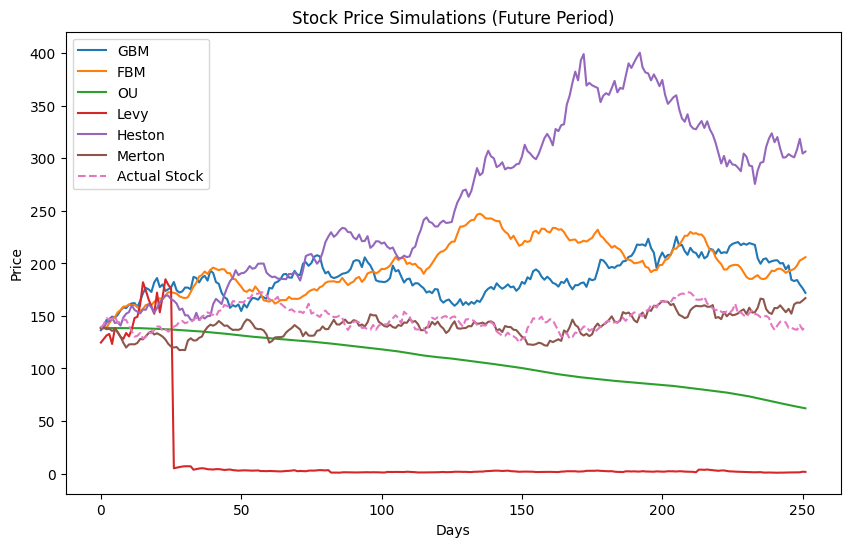

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import levy_stable
from fbm import FBM

# GBM (Geometric Brownian Motion)
def generate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)  # Geometric Brownian Motion
    return S

# FBM (Fractional Brownian Motion)
def generate_fbm(S0, hurst, T, N):
    f = FBM(n=N-1, hurst=hurst, length=T)
    fbm_vals = f.fbm()
    S = S0 * np.exp(fbm_vals)
    return S

# OU (Ornstein-Uhlenbeck Process)
def generate_ou(S0, mu, sigma, theta, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = np.zeros(N)
    X[0] = S0
    for i in range(1, N):
        X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * W[i]
    return X

# Lévy Process
def generate_levy(S0, alpha, beta, T, N):
    dt = T / N
    W = levy_stable.rvs(alpha=alpha, beta=beta, size=N) * np.sqrt(dt)
    W = np.cumsum(W)
    S = S0 * np.exp(W)
    return S

# Heston Model (Stochastic Volatility)
def generate_heston(S0, V0, kappa, theta, xi, rho, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W1 = np.random.standard_normal(size=N)
    W2 = np.random.standard_normal(size=N)
    W2 = rho * W1 + np.sqrt(1 - rho**2) * W2
    V = np.zeros(N)
    V[0] = V0
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        V[i] = V[i-1] + kappa * (theta - V[i-1]) * dt + xi * np.sqrt(V[i-1]) * W2[i] * np.sqrt(dt)
        S[i] = S[i-1] * np.exp((mu - 0.5 * V[i-1]) * dt + np.sqrt(V[i-1]) * W1[i] * np.sqrt(dt))
    return S

# Merton Jump Diffusion Model
def generate_merton(S0, mu, sigma, lam, m, v, T, N):
    dt = T / N
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    poisson_process = np.random.poisson(lam * dt, N)
    jump_sizes = np.random.normal(m, v, N)
    jump = np.cumsum(jump_sizes * poisson_process)
    X = (mu - 0.5 * sigma ** 2) * np.linspace(0, T, N) + sigma * W + jump
    S = S0 * np.exp(X)
    return S

# Function to calculate MSE
def calculate_mse(simulated, actual):
    return np.mean((simulated - actual) ** 2)

# Download stock data
def get_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data['Adj Close'].values

# Function to calculate historical returns
def calculate_returns(prices):
    log_returns = np.diff(np.log(prices))
    return log_returns

# Function to fit mu and sigma based on historical data
def fit_mu_sigma(stock_data):
    log_returns = calculate_returns(stock_data)
    mu = np.mean(log_returns) * 252  # annualized return
    sigma = np.std(log_returns) * np.sqrt(252)  # annualized volatility
    return mu, sigma

# Parameters for stock simulation
S0 = 100  # Initial stock price
T = 1     # 1 year
N = 252   # Number of time steps (daily)
hurst = 0.75  # Hurst exponent for FBM
theta = 0.1  # Mean reversion level for OU
kappa = 0.3  # Speed of mean reversion for Heston
xi = 0.1  # Volatility of volatility for Heston
rho = -0.7  # Correlation between stock price and volatility in Heston
V0 = 0.2  # Initial variance for Heston
alpha = 1.5  # Stability parameter for Levy process
beta = 0  # Skewness parameter for Levy process
lam = 0.75  # Jump intensity for Merton
m = 0  # Mean of jump size for Merton
v = 0.1  # Std dev of jump size for Merton

# Fetch actual stock data
ticker = 'AAPL'  # Example: Apple Inc.
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data = get_stock_data(ticker, start=start_date, end=end_date)

# Split data into past (for fitting) and future (for comparison)
split_ratio = 0.8
split_index = int(len(stock_data) * split_ratio)
past_data = stock_data[:split_index]
future_data = stock_data[split_index:]

# Fit mu and sigma using historical stock data
mu, sigma = fit_mu_sigma(past_data)

# Simulate each process for the future
gbm_stock = generate_gbm(future_data[0], mu, sigma, T, N)
fbm_stock = generate_fbm(future_data[0], hurst, T, N)
ou_stock = generate_ou(future_data[0], mu, sigma, theta, T, N)
levy_stock = generate_levy(future_data[0], alpha, beta, T, N)
heston_stock = generate_heston(future_data[0], V0, kappa, theta, xi, rho, T, N)
merton_stock = generate_merton(future_data[0], mu, sigma, lam, m, v, T, N)

# Resize future stock data to match simulation length
future_data_resized = np.resize(future_data, N)

# Calculate MSE for each model
mse_gbm = calculate_mse(gbm_stock, future_data_resized)
mse_fbm = calculate_mse(fbm_stock, future_data_resized)
mse_ou = calculate_mse(ou_stock, future_data_resized)
mse_levy = calculate_mse(levy_stock, future_data_resized)
mse_heston = calculate_mse(heston_stock, future_data_resized)
mse_merton = calculate_mse(merton_stock, future_data_resized)

# Display the MSE results
print("MSE Results (based on future stock data):")
print(f"GBM MSE: {mse_gbm}")
print(f"FBM MSE: {mse_fbm}")
print(f"OU MSE: {mse_ou}")
print(f"Lévy MSE: {mse_levy}")
print(f"Heston MSE: {mse_heston}")
print(f"Merton MSE: {mse_merton}")

# Plotting the stock price simulations
plt.figure(figsize=(10, 6))
plt.plot(gbm_stock, label='GBM')
plt.plot(fbm_stock, label='FBM')
plt.plot(ou_stock, label='OU')
plt.plot(levy_stock, label='Levy')
plt.plot(heston_stock, label='Heston')
plt.plot(merton_stock, label='Merton')
plt.plot(future_data_resized, label='Actual Stock', linestyle='--')
plt.title('Stock Price Simulations (Future Period)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


# Analysis of Stochastic Models for Stock Price Prediction
**GBM** and **OU** are simpler models but lack the flexibility to capture more complex market behaviors like jumps and stochastic volatility.
**Heston** and **Merton models** offer more realistic representations of stock price movements by incorporating stochastic volatility and jumps, respectively.
 **FBM** might work well for stocks with long-term trends or cyclic behavior, while **Lévy and Merton** are better for stocks prone to sudden movements.
Each model has its own strengths and limitations, and the best choice depends on the stock’s behavior and market conditions. In general, Heston and Merton Jump Diffusion models are more robust for real-world stock prediction, especially for stocks with high volatility or jump-like behaviors.
finally For most real-world stock predictions, Heston and Merton are more robust and capture more complex market behaviors than simpler models like GBM or OU.


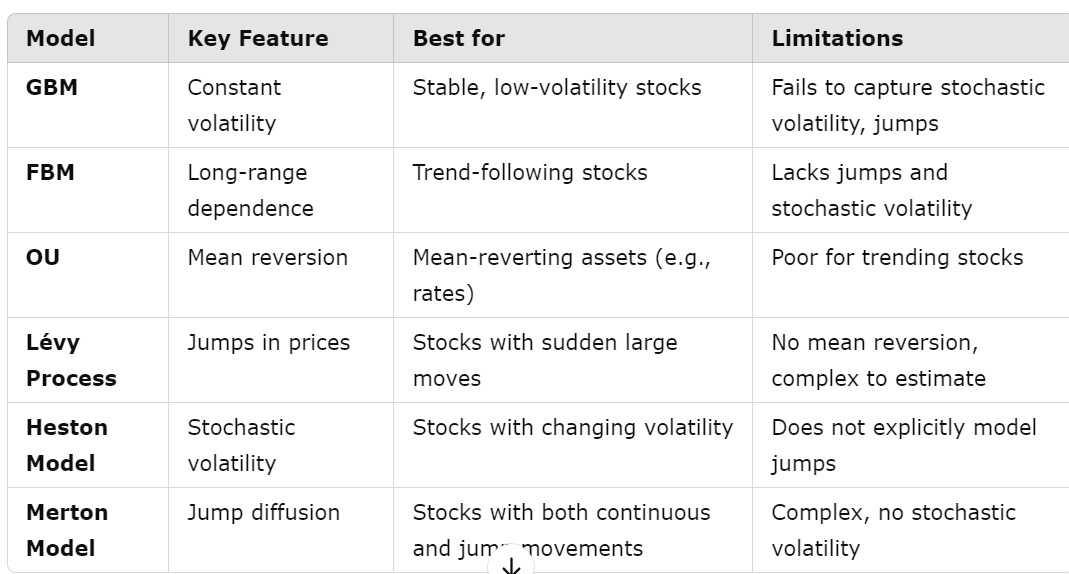